In [2]:
#import stuff to make some fake data to play with.
import numpy as np

In [4]:
#these imports enable us to change things like where plots appear
#what is used in the legends etc
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
matplotlib.rcParams.update({'font.size': 25})
matplotlib.rcParams['legend.numpoints'] = 1

In [5]:
#make some fake data. Lets generate 100 x points from a uniform distribution
#and 100 y points from a Gaussian distribution
#parameters for the uniform distribution
x_min = 0
x_max = 10

#parameters for the gaussian distribution
y_mean = 0
y_sd = 1

x_data = np.random.uniform(x_min, x_max, size=500)
y_data = np.random.normal(y_mean, y_sd, size=500)

#let's also create a second data set:

x_data_2 = np.random.uniform(x_min+1, x_max-2, size=500)
y_data_2 = np.random.normal(y_mean, y_sd-0.5, size=500)

y_min = min(y_data)
y_max = max(y_data)

/anaconda2/envs/ligo-py27/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


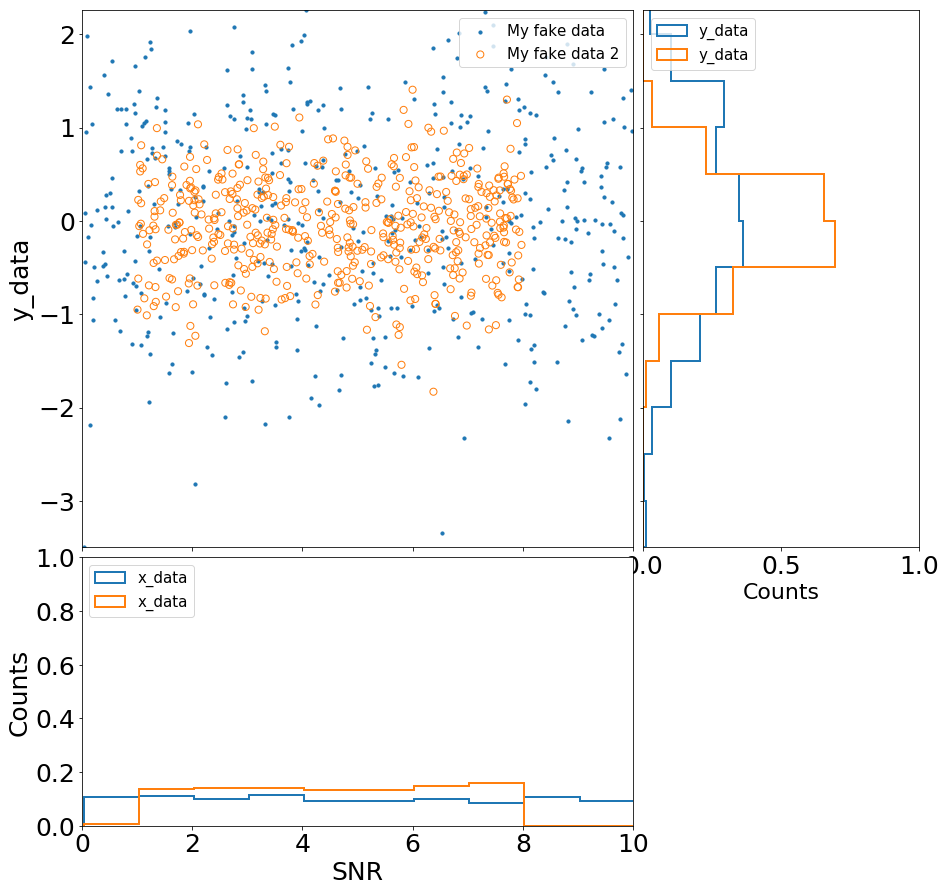

In [6]:
#some setup for your histograms. 
xbinwidth = 1
ybinwidth = 0.5

xbins = np.arange(min(x_data), max(x_data) + xbinwidth, xbinwidth)
ybins = np.arange(min(y_data), max(y_data) + ybinwidth, ybinwidth)


#create the figure with the given size
f = plt.figure(figsize = (15,15))
#turn the figure into a grid with 4 sections, but we will only use 3
#give the width and height ratios. 
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[2, 1],
                       height_ratios=[2, 1]
                       )
#spacing between the adjacent subplots in the grid
gs.update(wspace=0.025, hspace=0.025)

#the main scatter plot:
ax1 = plt.subplot(gs[0])
#scatter plot of first data set
ax1.scatter(x_data, y_data, s= 10,
            c = 'tab:blue', label = 'My fake data')

#second data set but with a different marker style: open circles
ax1.scatter(x_data_2, y_data_2, s= 50,facecolor = 'none',
           edgecolor = 'tab:orange', label = 'My fake data 2')
#set up axes:
ax1.set_xlim([x_min,x_max])
ax1.set_ylim([y_min, y_max])
ax1.set_yscale('linear')
ax1.set_ylabel('y_data')
#no x-label as it will go onto the lower histogram in a second
#make a legend
ax1.legend(loc = 'upper right', scatterpoints=1 ,prop={'size': 15}, frameon = True)
#remove the tick labels on the x-axis, x-tick labels will be on the lower histogram
ax1.xaxis.set_ticklabels([])

# the histogram of the quantity on the vertical axis, I normalized the histogram, 
#if you don't normalize just change the x-lims to ensure the number of counts can be
#seen
ax2 = plt.subplot(gs[1])
ax2.hist(y_data, bins=ybins, color = 'tab:blue', histtype = 'step', lw = 2,
         orientation= 'horizontal', label = 'y_data', normed = True)
ax2.hist(y_data_2, bins=ybins, color = 'tab:orange', histtype = 'step', lw = 2,
         orientation= 'horizontal', label = 'y_data', normed = True)
ax2.set_xlabel('Counts', fontsize=22)
#make sure the y-lim is the same as above
ax2.set_ylim([y_min, y_max])
ax2.set_xlim([0, 1])
ax2.set_yscale('linear')
ax2.yaxis.set_ticklabels([])
ax2.legend(loc = 'upper left',prop={'size': 15})


# the histogram of the quantity on the vertical axis
ax3 = plt.subplot(gs[2])
ax3.hist(x_data, bins=xbins, color = 'tab:blue', histtype = 'step', lw = 2,
        label = 'x_data', normed = True)
ax3.hist(x_data_2, bins=xbins, color = 'tab:orange', histtype = 'step', lw = 2,
        label = 'x_data', normed = True)
ax3.set_xlim([x_min, x_max])
ax3.set_ylim([0, 1])
ax3.set_ylabel('Counts')
ax3.set_xlabel('SNR')
ax3.legend(loc = 'upper left',prop={'size': 15})
plt.savefig('example_2hist.png')
plt.show()

In [15]:
#some plot styles for Alistair

#generate some new fake data:

#make 4 sets of fake data. Lets generate 100 x points from a uniform distribution
#and 100 y points from a Gaussian distribution
#parameters for the uniform distribution

#set 1:
mean_1 = 0.5
sd_1 = 0.1
data_1 = np.random.normal(mean_1, sd_1, size=500)

#set 2:
mean_2 = 5
sd_2 = 3
data_2 = np.random.normal(mean_2, sd_2, size=500)

#set 3:
mean_3 = 25
sd_3 = 4
data_3 = np.random.normal(mean_3, sd_3, size=500)

#set 4:
mean_4 = 15
sd_4 = 3
data_4 = np.random.normal(mean_4, sd_4, size=500)


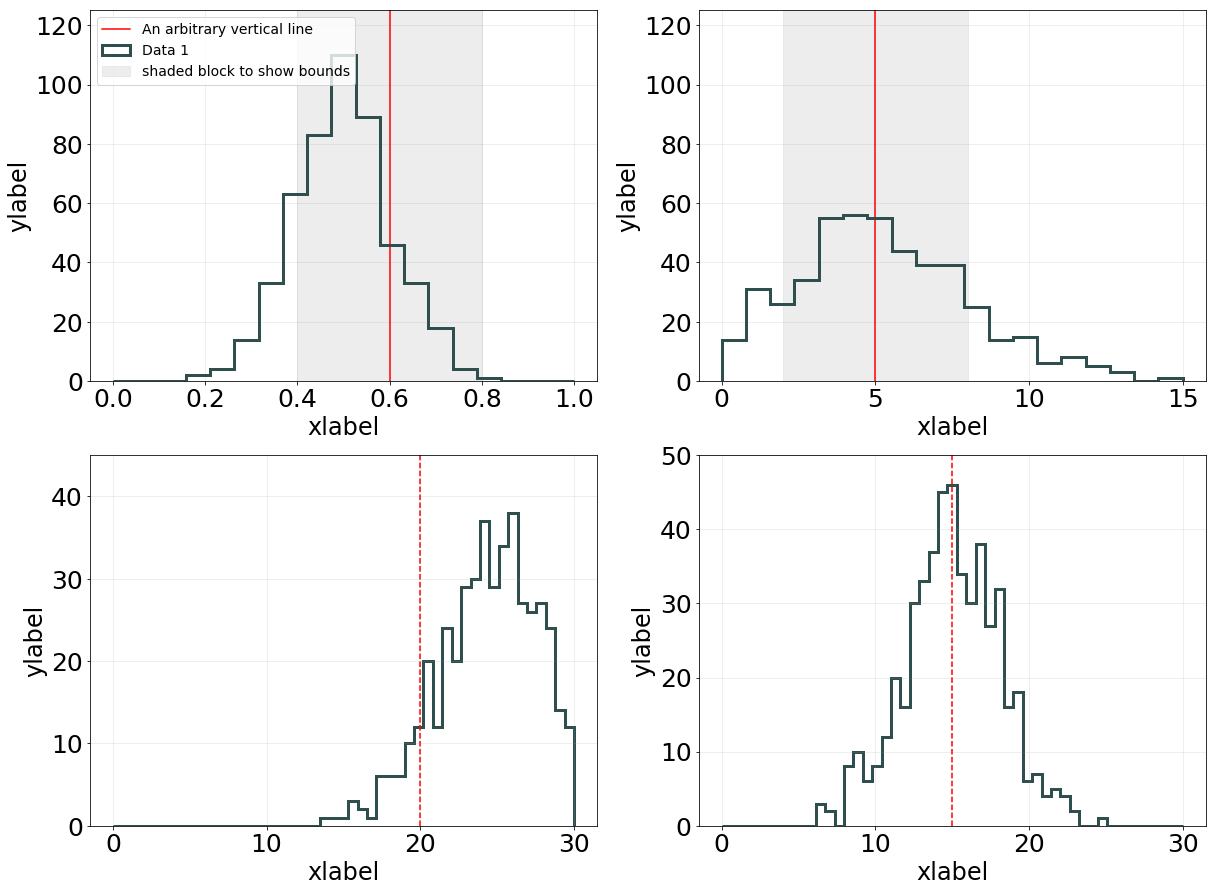

In [54]:
#4 subplots with no axes that are shared
#define the bins for each data set:
bins_1 = np.linspace(0, 1, 20)
bins_2 = np.linspace(0, 15, 20)
bins_3 = np.linspace(0, 30, 50)
bins_4 = np.linspace(0, 30, 50)

#pick either 'bar' or 'step' histogram type
hist_type = 'step'

#generate plot: 4 plots, 2 rows 2 columns, none of the axes are shared. Set whitespace between
fig, axs = plt.subplots(2, 2, sharey = 'none', sharex = 'none',
                        gridspec_kw={'hspace': 0.2, 'wspace': 0.2}, figsize = (20,15))

(ax1, ax2), (ax3, ax4) = axs

ax1.hist(data_1, bins = bins_1, color = 'darkslategrey', histtype=hist_type, lw = 3,
         label = 'Data 1', zorder = 5)

#you can use this to shade an area behind the histogram to indicate bounds
ax1.axvspan(0.4, 0.8, 
            alpha=0.5, color='gainsboro', label = 'shaded block to show bounds')

#or can use this to shade an area behind the histogram to indicate bounds
#define the vertical line length:
vert_line_1 = np.linspace(0, 150, 100)
ax1.plot([0.6]*100, vert_line_1, 'r-', label = 'An arbitrary vertical line')


ax1.set_ylim([0, 125])
ax1.set_ylabel('ylabel', fontsize = 24)
ax1.set_xlabel('xlabel',  fontsize = 24)
ax1.grid(b=True, color='#999999', linestyle='-', alpha=0.2)
#if you have the same assignment of things on the plots you can get away with just one 
#legend rather than one per plot
ax1.legend(loc = 'upper left', fontsize = 14)

#second histogram
ax2.hist(data_2, bins = bins_2, color = 'darkslategrey', histtype=hist_type, lw = 3,
         label = 'Data 2', zorder = 5)

#you can use this to shade an area behind the histogram to indicate bounds
ax2.axvspan(2, 8, 
            alpha=0.5, color='gainsboro', label = 'shaded block to show bounds')

#add a vertical line
ax2.plot([5]*100, vert_line_1, 'r-', label = 'An arbitrary vertical line')


ax2.set_ylim([0, 125])
ax2.set_ylabel('ylabel', fontsize = 24)
ax2.set_xlabel('xlabel',  fontsize = 24)
ax2.grid(b=True, color='#999999', linestyle='-', alpha=0.2)


# third histogram
#if you want a style that is filled instead, you can change the 'histtype'
ax3.hist(data_3, bins = bins_3, color = 'darkslategrey', histtype=hist_type, lw = 3,
         label = 'Data 3', zorder = 1)


#change a linestyle so it has long dashes. zorder is the order in which the things are plotted
#so you want the line on top of the bars 
ax3.plot([20]*100, vert_line_1, 'r--', label = 'An arbitrary vertical line', zorder = 2)


ax3.set_ylim([0, 45])
ax3.set_ylabel('ylabel', fontsize = 24)
ax3.set_xlabel('xlabel',  fontsize = 24)
ax3.grid(b=True, color='#999999', linestyle='-', alpha=0.2)


# fourth histogram
#if you want a style that is filled instead, you can change the 'histtype'
ax4.hist(data_4, bins = bins_3, color = 'darkslategrey', histtype=hist_type, lw = 3,
         label = 'Data 3', zorder = 1)

#change a linestyle so it has long dashes. zorder is the order in which the things are plotted
#so you want the line on top of the bars 
ax4.plot([15]*100, vert_line_1, 'r--', label = 'An arbitrary vertical line', zorder = 2)


ax4.set_ylim([0, 50])
ax4.set_ylabel('ylabel', fontsize = 24)
ax4.set_xlabel('xlabel',  fontsize = 24)
ax4.grid(b=True, color='#999999', linestyle='-', alpha=0.2)

#uncomment the savefig line and comment the show line to save the figure
#plt.savefig('outputname.png')
plt.show()